In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd 
import tensorflow as tf

In [3]:
x1=np.array([0,0,1,1])
x2=np.array([0,1,0,1])
y=np.array([0,0,0,1])
df_or=pd.DataFrame({'X1':x1,'X2':x2,'y':y})
df_or

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
Xd=np.asarray(df_or.iloc[:,0:2]) 
yd=np.reshape(np.asarray([df_or.iloc[:,2]]),[4,1])

In [6]:
x=tf.placeholder(tf.float32,shape=[4,2])
y=tf.placeholder(tf.float32,shape=[4,1])

In [7]:
W1=tf.Variable(tf.random_uniform([2,1])) 
b1=tf.Variable(tf.zeros([1])) 

In [8]:
ini=tf.global_variables_initializer() 
sess=tf.InteractiveSession()
sess.run(ini)

In [9]:
z1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 

In [10]:
#lossfn = tf.reduce_mean(tf.reduce_sum((z1-y)**2))
lossfn= tf.reduce_mean(( (y * tf.log(z1)) +  
  ((1 - y) * tf.log(1.0 - z1)) ) * -1) # cross entropy

In [11]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(lossfn)

In [12]:
ini=tf.global_variables_initializer() 

In [14]:
with tf.Session() as sess:
    corrpred=tf.equal(tf.round(z1),y)
    acc=tf.reduce_mean(tf.cast(corrpred,tf.float32))
    #print(sess.run(acc,feed_dict={x:Xd,y:yd}))

In [15]:
sess.run(ini)
while (sess.run(acc,feed_dict={x: Xd,y: yd})) != 1.0:
    sess.run(train_step,feed_dict={x: Xd, y: yd})

for i in range(50):
    sess.run(train_step, feed_dict={x: Xd, y: yd})    

In [16]:
correct_prediction = tf.equal(tf.round(z1),y) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: Xd, y: yd})) # las corremos

1.0


In [18]:
sess.run(b1)

array([-0.74647307], dtype=float32)

In [19]:
zz1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 

In [22]:
yhat=np.round(sess.run(zz1,feed_dict={x:Xd}))
yhat

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.]], dtype=float32)

In [25]:
w1=sess.run(W1)[0]


In [30]:
w2=sess.run(W1)[1]
b=sess.run(b1)

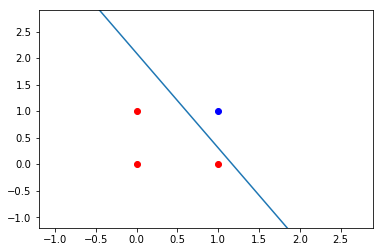

In [31]:
plt.scatter(df_or[df_or['y']==1]['X1'],df_or[df_or['y']==1]['X2'],color='blue') 
plt.scatter(df_or[df_or['y']==0]['X1'],df_or[df_or['y']==0]['X2'],color='red')
plt.xlim(-1.2,2.9)
plt.ylim(-1.2,2.9)
x=np.linspace(-1,2,10)
plt.plot(x,-(b/w2)-(w1/w2)*x)

In [34]:
sess.run(z1,feed_dict={x:Xd})

TypeError: unhashable type: 'numpy.ndarray'

numpy.ndarray

**XOR**